# Analyse du mot 'personne' dans les avis du CCNE   

Code avec : 
tirage d'une base totalement aléatoire filtrée avec les mots d'intérêt pour exploration et rédaction de la guideline d'annotation
export de cette base

embedding des mots choisis

tirage d'un set représentatif de phrases.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# The autoreload extension is already loaded. To reload it, use:
#%reload_ext autoreload
import sys
sys.path.append('./helpers')  # Add the src directory to the Python path

seed = 1968

from database_creation import open_avis, join_metadata, corpus_to_sentences_with_context, filter_sentences_with_words, has_words
from display import interactive_sentence_display, generate_sentences_pdf

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leopo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leopo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Base mise au niveau de la phrase, et exemples pour guideline d'annotation

In [2]:
# Step 1: Open Avis
base_avis_ccne = open_avis(rescrap_texte=False)

# Step 2: Join Metadata
base_avis_ccne = join_metadata(base_avis_ccne)

# Step 3: Transform to Sentences with Context
base_sentences = corpus_to_sentences_with_context(base = base_avis_ccne)

# Step 4: Filter on sentences with 'personne' in it
base_filtered = filter_sentences_with_words(base_sentences,["personne","personnes",'humain','humains','humaine','humaines'])

# Step 5: Sample 100 sentences
samples = base_filtered.sample(100, random_state = seed)
# le tirage original fut fait avec ["personne","personnes","humain","humains","humaine","humaines"]
# et surtout une fonction has_words qui regardait si la chaine "personne" était présente et donc "personnel" sortait positif.


              corpus_to_sentences_with_context :
              is  the number of sentences counted corresponding to the number of rows by 'num' ?
              True


In [ ]:
# Step 6: Display samples
interactive_sentence_display(samples)

In [4]:
generate_sentences_pdf(samples, "../output/exploration/phrase_personne_humain.pdf")

# Key words

In [3]:
synonyms = {
    'person': ['personne', 'personnes'],
    'human': ['humain', 'humaine', 'humains', 'humaines'],
    'individu': ['individu', 'individus'],
    'societe': ['société', 'sociétés', 'societé', 'societés', 'sociéte', 'sociétes', 'societe', 'societes'],
    'nature': ['nature','natures'],
    'environment': ['environnement','environnements'],
    'génétique':["génétique","génétiques","gène","gènes"]
    
}

# Présence lexicale et export

## Présence lexicale

In [4]:
print(f"Nombre de phrases total dans les avis : {len(base_sentences)}")

for key in synonyms.keys():
    has_specific_words = lambda x: has_words(x, words=synonyms[key])
    base_sentences[key] = base_sentences['sentence'].apply(has_specific_words)
    n = sum(base_sentences[key])
    print(f"Le nombre de phrases qui contient {synonyms[key]} est {n}")

Nombre de phrases total dans les avis : 54231
Le nombre de phrases qui contient ['personne', 'personnes'] est 5091
Le nombre de phrases qui contient ['humain', 'humaine', 'humains', 'humaines'] est 2487
Le nombre de phrases qui contient ['individu', 'individus'] est 657
Le nombre de phrases qui contient ['société', 'sociétés', 'societé', 'societés', 'sociéte', 'sociétes', 'societe', 'societes'] est 1407
Le nombre de phrases qui contient ['nature', 'natures'] est 651
Le nombre de phrases qui contient ['environnement', 'environnements'] est 350
Le nombre de phrases qui contient ['génétique', 'génétiques', 'gène', 'gènes'] est 2392


## Export

In [5]:
base_sentences.to_feather("../data/intermediate/big/base_sentences.feather")

# Embedding

In [23]:
# Define the list of words
word_list = ["personne", "humain", "individu","nature","société","enfant","femme","génétique","cellule","données","santé","éthique","recherche","loi","droit","risque","malade"]

In this code snippet, we are performing various operations on textual data using the BERT (Bidirectional Encoder Representations from Transformers) model, particularly focusing on generating embeddings for a list of French words. The BERT model used here is specifically trained for French language understanding tasks, known as CamemBERT.

First, we load the pre-trained CamemBERT model and tokenizer from the Hugging Face library. The tokenizer is responsible for tokenizing the input text into individual tokens recognizable by the model, while the model itself is capable of generating contextualized embeddings for these tokens.

Next, we define a list of French words for which we want to generate embeddings. These words are tokenized using the CamemBERT tokenizer, converting them into token IDs recognizable by the model.

We then feed these tokenized inputs into the CamemBERT model. Specifically, we utilize the model to obtain the hidden states of the last layer. These hidden states contain rich contextual information about each token in the input.

From the hidden states of the last layer, we calculate the mean embedding for each word by averaging the embeddings of all tokens corresponding to that word. This mean pooling operation allows us to obtain a single fixed-size embedding vector for each word.

Furthermore, we compute pairwise cosine similarity/distance between the embeddings of the words, providing insight into the semantic similarity or dissimilarity between the words.

Additionally, we perform Principal Component Analysis (PCA) on the embeddings to visualize them in a lower-dimensional space. PCA is a dimensionality reduction technique that helps capture the most significant variations in the data, allowing us to visualize the embeddings in a more interpretable 2D space.

Overall, the type of embedding we are generating in this process is contextualized word embeddings using CamemBERT, specifically by extracting the hidden states from the last layer of the model and subsequently averaging them to obtain word-level embeddings. These embeddings capture the contextual information of each word within the given text data, enabling downstream NLP tasks such as semantic similarity comparison, clustering, or classification.

## Word2Vec

In [24]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

type_embedding =  "Word2Vec"

# Tokenize sentences
tokenized_sentences = [sentence.lower().split() for sentence in base_sentences["sentence"]]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)


# Get embeddings for each word
embeddings = [model.wv[word] for word in word_list]


## Affichage

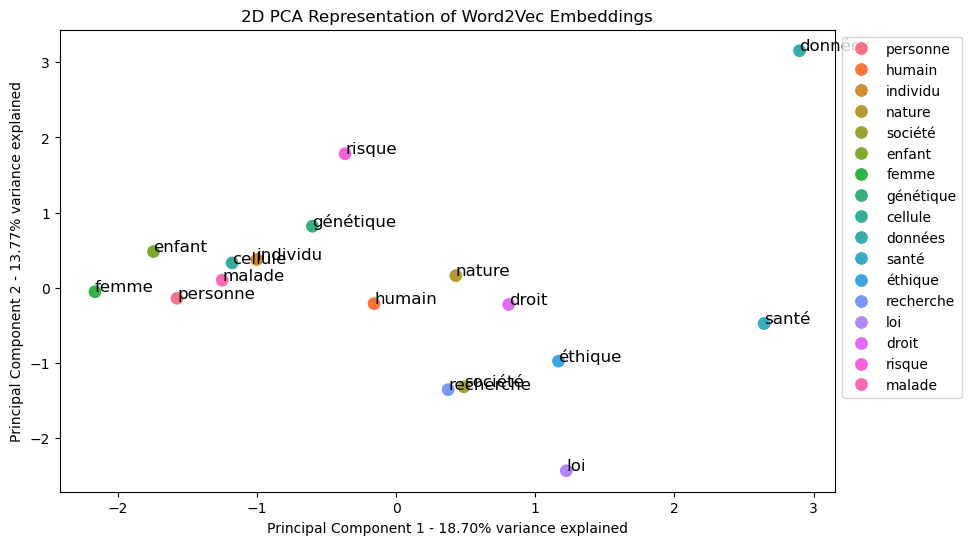

Cosine similarity Matrix:


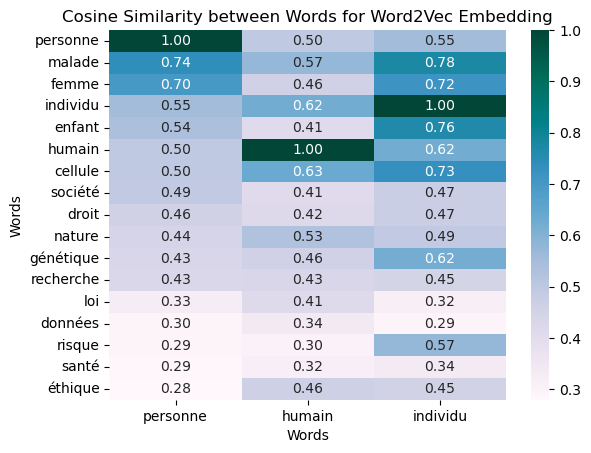

Euclidian distance Matrix:


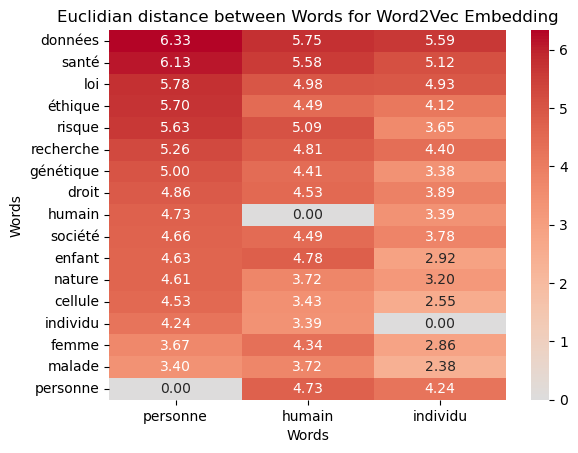

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot PCA result using Seaborn
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Word'] = word_list

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Word', s=100)
for i in range(len(word_list)):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Word'][i], fontsize=12)
plt.xlabel('Principal Component 1 - {:.2f}% variance explained'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('Principal Component 2 - {:.2f}% variance explained'.format(pca.explained_variance_ratio_[1] * 100))
plt.title(f'2D PCA Representation of {type_embedding} Embeddings')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# Compute pairwise cosine similarity/distance
distance_matrix = np.zeros((len(word_list), len(word_list)))
for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        similarity = cosine_similarity([embeddings[i]], [embeddings[j]])
        distance_matrix[i][j] = similarity[0][0]  # Extracting the scalar value

# Print distance matrix with proper representation
print("Cosine similarity Matrix:")
df_distance_matrix = pd.DataFrame(distance_matrix, index=word_list, columns=word_list).sort_values(by = "personne", ascending=False)
sns.heatmap(df_distance_matrix[["personne","humain","individu"]], annot=True, cmap='PuBuGn', fmt=".2f")
plt.xlabel('Words')
plt.ylabel('Words')
plt.title(f'Cosine Similarity between Words for {type_embedding} Embedding')
plt.show()

# Compute pairwise cosine similarity/distance
distance_matrix = np.zeros((len(word_list), len(word_list)))
for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        similarity = euclidean_distances([embeddings[i]], [embeddings[j]])
        distance_matrix[i][j] = similarity[0][0]  # Extracting the scalar value

print("Euclidian distance Matrix:")
df_distance_matrix = pd.DataFrame(distance_matrix, index=word_list, columns=word_list).sort_values(by = "personne", ascending=False)
sns.heatmap(df_distance_matrix[["personne","humain","individu"]], annot=True, cmap='coolwarm', fmt=".2f",center=0)
plt.xlabel('Words')
plt.ylabel('Words')
plt.title(f'Euclidian distance between Words for {type_embedding} Embedding')
plt.show()

# Bert Fine tune

In [63]:
problem = base_sentences[(base_sentences["num"] == 140) & (base_sentences["sentence_index"] == 472)]["sentence"]
# Convert sentence object to string
problem = ' '.join(problem)

print(separate_footnote_numbers(problem))

Cependant, l’accompagnement et la relation, qui ne peuvent être inscrits dans le droit, sont aussi importants pour le respect de la personne 84.


In [53]:
base_sentences[(base_sentences["num"] == 140) & (base_sentences["sentence_index"].isin(np.arange(465,480)))]

,previous,sentence,next,sentence_index,number_sentences,num,avis,nom_fichier,nb_pages,rapporteurs,...,nb_mots,president,Annee,person,human,individu,societe,nature,environment,génétique
51326,Il y a ur- gence à transformer l’offre de soin...,La crise de l’hôpital public appelle à une red...,"La santé en action, n° 460, juin 2022, ed.",465,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51327,La crise de l’hôpital public appelle à une red...,"La santé en action, n° 460, juin 2022, ed.",Santé publique France.,466,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51328,"La santé en action, n° 460, juin 2022, ed.",Santé publique France.,40 140 et à une sortie du cloisonnement actuel...,467,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51329,Santé publique France.,40 140 et à une sortie du cloisonnement actuel...,Cela implique en particulier de lutter contre ...,468,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51330,40 140 et à une sortie du cloisonnement actuel...,Cela implique en particulier de lutter contre ...,3.3.,469,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51331,Cela implique en particulier de lutter contre ...,3.3.,Faire vivre une éthique du respect des parties...,470,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51332,3.3.,Faire vivre une éthique du respect des parties...,"Cependant, l’accompagnement et la relation, qu...",471,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,True,False,False,False,False,False,False
51333,Faire vivre une éthique du respect des parties...,"Cependant, l’accompagnement et la relation, qu...",Il faut mieux reconnaître le rôle majeur de la...,472,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False
51334,"Cependant, l’accompagnement et la relation, qu...",Il faut mieux reconnaître le rôle majeur de la...,L’interdisciplinarité permet d’approcher la di...,473,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,True,False,False,False,False,False,False
51335,Il faut mieux reconnaître le rôle majeur de la...,L’interdisciplinarité permet d’approcher la di...,Cela implique également la prise en compte des...,474,600,140,140 140 REPENSER LE SYSTEME DE SOINS SUR UN FO...,Avis 140.pdf,54,"Annabel Desgrées du Loû,Régis Aubry,Frédéric W...",...,22025,Delfraissy (16-),2022,False,False,False,False,False,False,False


In [52]:
np.arange(465,480)

array([465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479])